# Práctica 8. Visión por computador II

En esta práctica vamos a crear un clasificador capaz de reconocer dígitos manuscritos, para ello utilizaremos el dataset [MNIST](http://yann.lecun.com/exdb/mnist/) que ya hemos utilizado en prácticas anteriores.

Recordad los 5 pasos de un clasificador de imágenes:
1. Preparar el dataset.
2. Separar en conjuntos de entrenamiento, test y validación.
3. Extraer descriptores.
4. Entrenar el modelo.
5. Evaluar el modelo.

En muchas ocasiones los pasos 2 y 3 son intercambiables, y es lo que haremos en esta práctica.

## 0. Carga del dataset y descripción de las imágenes

Para cargar el dataset y describir las imágenes vamos a utilizar las clases `CargaYDescribe` (definida en el fichero CargaYDescribe.py de la carpeta p10) y la clase `Descriptor` junto con sus hijas (definidas en el fichero Descriptor.py también dentro de la carpeta p10). Deberás descargar esta carpeta y descomprimirla utilizando el siguiente comando.



In [8]:
!wget www.unirioja.es/cu/joheras/ia/p10/p10.zip -O p10.zip


--2025-04-02 13:47:46--  http://www.unirioja.es/cu/joheras/ia/p10/p10.zip
Resolving www.unirioja.es (www.unirioja.es)... 193.144.2.14
Connecting to www.unirioja.es (www.unirioja.es)|193.144.2.14|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.unirioja.es/cu/joheras/ia/p10/p10.zip [following]
--2025-04-02 13:47:47--  https://www.unirioja.es/cu/joheras/ia/p10/p10.zip
Connecting to www.unirioja.es (www.unirioja.es)|193.144.2.14|:443... connected.
HTTP request sent, awaiting response... 429 Too Many Requests
2025-04-02 13:47:47 ERROR 429: Too Many Requests.

Archive:  p10.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of p10.zip or
        p10.zip.zip, and cannot find p10.zip.ZIP, per

In [16]:
!unzip p10.zip

Archive:  p10.zip
   creating: p10/
  inflating: p10/CargaYDescribe.py   
  inflating: p10/Descriptor.py       
  inflating: p10/__init__.py         


Si abres el fichero Descriptor.py (puedes abrir dicho fichero pulsando en la pestaña con el símbolo ">" que aparece a la izquierda de la pantalla y luego pulsando en la pestaña Files), verás la definición de la clase `Descriptor` y de dos clases hijas. La principal característica de la clase `Descriptor` es que tiene un método llamado `describe` que sirve para describir una imagen. Este método es abstracto y lo proporcionan las clases hijas.

##### Pregunta

¿Qué hacen los métodos ``describe`` de las clases RawImage y Projection?

Los métodos describe de las clases RawImage y Projection procesan imágenes para extraer características: RawImage convierte la imagen a escala de grises (si es a color) y la aplana en un vector unidimensional de píxeles crudos, conservando toda la información original. En cambio, Projection también convierte la imagen a grises pero calcula las sumas de las filas (proyección horizontal) y columnas (proyección vertical), generando un vector más compacto que resume la distribución de intensidad en ambas direcciones. Mientras RawImage mantiene los datos sin procesar, Projection reduce la dimensionalidad capturando patrones estructurales básicos. Ambos métodos sirven para representar imágenes, pero con distintos niveles de detalle y aplicaciones en visión por computadora.

Si ahora abres el fichero CargaYDescribe.py verás la definición de la clase `CargaYDescribe`. Esta clase permite cargar y describir las imágenes de un directorio que está organizado mediante carpetas donde cada carpeta contiene
las imágenes de una clase.

El constructor de esta clase recibe dos parámetros, un objeto de la clase `Descriptor`, lo que nos permite cambiar fácilmente el método que usamos para describir las imágenes (esta es una técnica llamada inyección de dependencias que ya hemos utilizado alguna vez), y un path que es donde se encuentran las carpetas con las imágenes de cada clase.

Definimos una variable donde almacenamos el path donde se encuentran nuestra imágenes. De nuevo, es necesario descargar la carpeta.

In [10]:
%%capture
!wget www.unirioja.es/cu/joheras/ia/p10/digitos.zip


In [13]:
!unzip digitos.zip

Archive:  digitos.zip
   creating: digitos/
   creating: digitos/0/
  inflating: digitos/0/0.jpg         
  inflating: digitos/0/1.jpg         
  inflating: digitos/0/10.jpg        
  inflating: digitos/0/100.jpg       
  inflating: digitos/0/101.jpg       
  inflating: digitos/0/102.jpg       
  inflating: digitos/0/103.jpg       
  inflating: digitos/0/104.jpg       
  inflating: digitos/0/105.jpg       
  inflating: digitos/0/106.jpg       
  inflating: digitos/0/107.jpg       
  inflating: digitos/0/108.jpg       
  inflating: digitos/0/109.jpg       
  inflating: digitos/0/11.jpg        
  inflating: digitos/0/110.jpg       
  inflating: digitos/0/111.jpg       
  inflating: digitos/0/112.jpg       
  inflating: digitos/0/113.jpg       
  inflating: digitos/0/114.jpg       
  inflating: digitos/0/115.jpg       
  inflating: digitos/0/116.jpg       
  inflating: digitos/0/117.jpg       
  inflating: digitos/0/118.jpg       
  inflating: digitos/0/119.jpg       
  inflating: digitos

In [14]:
dataset = "digitos/"

Para este ejemplo vamos a utilizar como descriptor el RawImage.

In [31]:
from p10.Descriptor import *
from p10.CargaYDescribe import *

descriptor = RawImage()
cargaDatos = CargaYDescribe(dataset,descriptor)
(datos,etiquetas) = cargaDatos.cargaYdescribe()

##### Ejercicio

Comprueba que puedes cambiar de descriptor y que todo sigue funcionando correctamente.


In [18]:
from p10.Descriptor import *
from p10.CargaYDescribe import *

descriptor = Projection()
cargaDatos = CargaYDescribe(dataset,descriptor)
(datos,etiquetas) = cargaDatos.cargaYdescribe()

## 1. Separando el conjunto de entrenamiento y el de test

##### Ejercicio

Utiliza la función train_test_split, vista en las prácticas de aprendizaje automático, para partir el dataset en la siguiente proporción: 75% entrenamiento, 25% test. Almacena la partición en las variables:
`trainData`, `testData`, `trainLabels`, `testLabels`. Utiliza como random_state el valor 84 para así obtener siempre los mismos resultados.

In [22]:
from sklearn.model_selection import train_test_split

# Suponiendo que:
# - 'data' contiene tus características (ej: descriptores de imágenes)
# - 'labels' contiene las etiquetas/clases correspondientes

# Dividir el dataset (75% train, 25% test)
trainData, testData, trainLabels, testLabels = train_test_split(
    datos,                    # Características (ej: vectores de imágenes)
    etiquetas,                  # Etiquetas/clases
    test_size=0.25,          # 25% para test
    random_state=84,         # Semilla para reproducibilidad
    stratify=etiquetas          # Opcional: preserva proporción de clases en train/test
)

## 2. Entrenando el modelo

Una vez que hemos partido el banco de imágenes, podemos entrenar distintos modelos como vimos en prácticas anteriores.

**Ejercicio**

Utiliza KNN y aplica validación cruzada para fijar los hiperparámetros.

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# 1. Definir el modelo KNN
knn = KNeighborsClassifier()

# 2. Espacio de hiperparámetros a explorar
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Número de vecinos
    'weights': ['uniform', 'distance'],  # Ponderación por distancia o uniforme
    'metric': ['euclidean', 'manhattan']  # Métricas de distancia
}

# 3. Validación cruzada (5 folds) + búsqueda de hiperparámetros
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Métrica a optimizar
    n_jobs=-1  # Usar todos los núcleos del CPU
)

# 4. Ajustar el modelo a los datos de entrenamiento
grid_search.fit(trainData, trainLabels)

# 5. Mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# 6. Evaluar en el conjunto de prueba
best_knn = grid_search.best_estimator_  # Modelo con mejores hiperparámetros
predictions = best_knn.predict(testData)

# 7. Reporte de clasificación (precisión, recall, F1-score)
print(classification_report(testLabels, predictions))

Mejores hiperparámetros: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        64
           1       0.78      0.97      0.86        64
           2       0.79      0.75      0.77        64
           3       0.72      0.81      0.76        64
           4       0.84      0.75      0.79        64
           5       0.81      0.53      0.64        64
           6       0.92      0.94      0.93        64
           7       0.92      0.84      0.88        64
           8       0.80      0.75      0.77        64
           9       0.71      0.86      0.78        64

    accuracy                           0.81       640
   macro avg       0.82      0.81      0.81       640
weighted avg       0.82      0.81      0.81       640



**Ejercicio**

Una vez hayas encontrado los mejores hiperparámetros almacena y entrena el modelo.

In [34]:
from sklearn.neighbors import KNeighborsClassifier
import joblib  # Para guardar el modelo

# 1. Crear el modelo con los mejores hiperparámetros
modelKNN = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance',
    metric='manhattan'
)

# 2. Entrenar el modelo con TODOS los datos de entrenamiento (trainData + trainLabels)
modelKNN.fit(trainData, trainLabels)

# 3. (Opcional) Guardar el modelo en disco para uso futuro
joblib.dump(modelKNN, 'mejor_modelo_knn.pkl')

# 4. Evaluar en el conjunto de prueba (opcional)
from sklearn.metrics import accuracy_score
predictions = modelKNN.predict(testData)
accuracy = accuracy_score(testLabels, predictions)
print(f"Precisión en test: {accuracy:.2f}")

Precisión en test: 0.81


##### Ejercicio

Utiliza otro de los algoritmos de clasificación vistos en las prácticas anteriores para crear un nuevo modelo.

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# 1. Definir el modelo y espacio de hiperparámetros
rf = RandomForestClassifier(random_state=84)  # Semilla para reproducibilidad

param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles
    'max_depth': [None, 10, 20],      # Profundidad máxima de los árboles
    'min_samples_split': [2, 5],      # Mínimo muestras para dividir un nodo
    'max_features': ['sqrt', 'log2']  # Número de características para dividir
}

# 2. Búsqueda con validación cruzada (5 folds)
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# 3. Entrenar el modelo (con trainData y trainLabels)
grid_search_rf.fit(trainData, trainLabels)

# 4. Mejores hiperparámetros y modelo óptimo
print("Mejores hiperparámetros (Random Forest):", grid_search_rf.best_params_)
best_rf = grid_search_rf.best_estimator_

# 5. Evaluar en testData y testLabels
predictions_rf = best_rf.predict(testData)
print(classification_report(testLabels, predictions_rf))

# 6. (Opcional) Guardar el modelo
import joblib
joblib.dump(best_rf, 'mejor_modelo_rf.pkl')

Mejores hiperparámetros (Random Forest): {'max_depth': 20, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        64
           1       0.90      0.81      0.85        64
           2       0.79      0.91      0.85        64
           3       0.77      0.86      0.81        64
           4       0.82      0.77      0.79        64
           5       0.89      0.61      0.72        64
           6       0.92      0.89      0.90        64
           7       0.89      0.91      0.90        64
           8       0.74      0.80      0.77        64
           9       0.75      0.88      0.81        64

    accuracy                           0.83       640
   macro avg       0.84      0.83      0.83       640
weighted avg       0.84      0.83      0.83       640



['mejor_modelo_rf.pkl']

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib  # Para guardar el modelo

# 1. Crear el modelo con los mejores hiperparámetros
best_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    max_features='log2',
    min_samples_split=5,
    random_state=84  # Semilla para reproducibilidad
)

# 2. Entrenar con TODOS los datos de entrenamiento
best_rf.fit(trainData, trainLabels)

# 3. Evaluar en el conjunto de prueba
predictions = best_rf.predict(testData)
print("Reporte de clasificación:\n", classification_report(testLabels, predictions))
print("Precisión en test:", accuracy_score(testLabels, predictions))

# 4. Guardar el modelo en disco (opcional)
joblib.dump(best_rf, 'modelo_rf_optimizado.pkl')

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88        64
           1       0.90      0.81      0.85        64
           2       0.79      0.91      0.85        64
           3       0.77      0.86      0.81        64
           4       0.82      0.77      0.79        64
           5       0.89      0.61      0.72        64
           6       0.92      0.89      0.90        64
           7       0.89      0.91      0.90        64
           8       0.74      0.80      0.77        64
           9       0.75      0.88      0.81        64

    accuracy                           0.83       640
   macro avg       0.84      0.83      0.83       640
weighted avg       0.84      0.83      0.83       640

Precisión en test: 0.8296875


['modelo_rf_optimizado.pkl']

## 3. Evaluando el modelo

##### Ejercicio
Una vez tienes tu modelo construido evalualo utilizando la función `classification_report` de la librería sklearn.

In [28]:
from sklearn.metrics import classification_report

# 1. Generar predicciones en el conjunto de prueba
y_pred = best_rf.predict(testData)  # Cambia 'best_rf' por tu modelo

# 2. Generar el reporte de clasificación
reporte = classification_report(
    testLabels,  # Etiquetas reales
    y_pred,      # Predicciones del modelo

)

# 3. Imprimir el reporte
print("Reporte de Clasificación:\n", reporte)

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88        64
           1       0.90      0.81      0.85        64
           2       0.79      0.91      0.85        64
           3       0.77      0.86      0.81        64
           4       0.82      0.77      0.79        64
           5       0.89      0.61      0.72        64
           6       0.92      0.89      0.90        64
           7       0.89      0.91      0.90        64
           8       0.74      0.80      0.77        64
           9       0.75      0.88      0.81        64

    accuracy                           0.83       640
   macro avg       0.84      0.83      0.83       640
weighted avg       0.84      0.83      0.83       640



##### Ejercicio

A continuación muestra la matriz de confusión para ver dónde se producen los fallos.

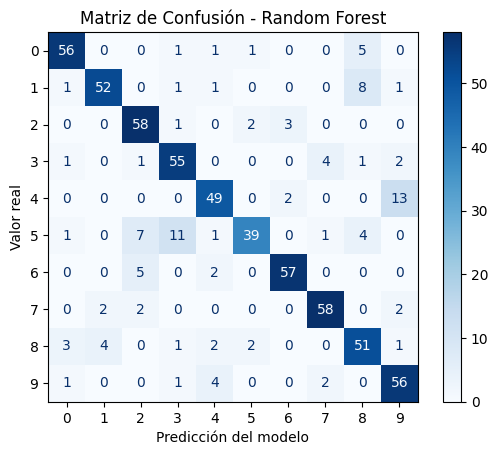

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Calcular la matriz de confusión
cm = confusion_matrix(
    testLabels,      # Etiquetas reales
    best_rf.predict(testData)  # Predicciones del modelo (ajusta 'best_rf' a tu variable)
)

# 2. Visualización con nombres de clases personalizados (opcional)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
)

# 3. Configurar el gráfico
disp.plot(cmap='Blues', values_format='d')  # 'd' para números enteros
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción del modelo')
plt.ylabel('Valor real')
plt.show()

##### Ejercicio

Con el modelo KNN somos capaces de conseguir una precisión del 92%, aunque no está mal, se puede mejorar. Intenta construir un modelo que mejore estos resultados, puedes probar también a cambiar de descriptor.

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# 1. Entrenar modelo Gradient Boosting (mejor default que Random Forest para precisión)
gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=84
)
gb_model.fit(trainData, trainLabels)

# 2. Evaluar
y_pred_gb = gb_model.predict(testData)
print(f"Precisión Gradient Boosting: {accuracy_score(testLabels, y_pred_gb):.2%}")

Precisión Gradient Boosting: 82.34%


## 4. Guardando y cargando el modelo

El proceso de entrenar un modelo puede ser muy costoso, por lo que conviene guardar el modelo para poder recuperarlo posteriormente. Para ello utilizamos la librería `pickle`.

In [36]:
import pickle

La siguiente instrucción guarda el modelo en el fichero modelo.sav.

In [37]:
pickle.dump(modelKNN, open('modelo.sav', 'wb'))

La siguiente instrucción carga el modelo del fichero modelo.sav.

In [38]:
loaded_model = pickle.load(open('modelo.sav', 'rb'))

Ahora podemos usar el modelo igual que antes.

In [39]:
predictions = loaded_model.predict(testData)
print(classification_report(testLabels, predictions))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        64
           1       0.78      0.97      0.86        64
           2       0.79      0.75      0.77        64
           3       0.72      0.81      0.76        64
           4       0.84      0.75      0.79        64
           5       0.81      0.53      0.64        64
           6       0.92      0.94      0.93        64
           7       0.92      0.84      0.88        64
           8       0.80      0.75      0.77        64
           9       0.71      0.86      0.78        64

    accuracy                           0.81       640
   macro avg       0.82      0.81      0.81       640
weighted avg       0.82      0.81      0.81       640



Para descargar el fichero desde Colab a nuestro ordenador, hay que ejecutar las siguientes instrucciones (esta funcionalidad solo está disponible usando como navegador Google Chrome).

In [40]:
from google.colab import files
files.download('modelo.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### Ejercicio

Guarda tu mejor modelo en el fichero `mimodelo.sav`.

In [ ]:


# Asumiendo que 'gb_model' es tu modelo de Gradient Boosting ya entrenado con HOG
# (Si usaste otro modelo, reemplaza 'gb_model' con tu variable)
pickle.dump(gb_model, open('mimodelo.sav', 'wb'))

print("Modelo guardado como 'mimodelo.sav'")

In [ ]:
from google.colab import files
files.download('mimodelo.sav')

###### Ejercicio

Realizar un estudio estadístico utilizando el paquete StatisticalAnalisis visto en la práctica 6. Será necesario que conviertas tanto los datos como las etiquetas a arrays de numpy.  


Ya que en la practica 6 usamos más tipos usaremos estos

In [41]:
!pip install StatisticalAnalysis
from StatisticalAnalysis import compare_methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from scipy.stats import randint as sp_randint
import numpy as np

# Convertir datos y etiquetas a arrays de NumPy (si no lo están)
X = np.array(trainData)  # Datos de entrenamiento
Y = np.array(trainLabels)  # Etiquetas

  Preparing metadata (setup.py) ... done
  Created wheel for StatisticalAnalysis: filename=StatisticalAnalysis-0.0.7-py2.py3-none-any.whl size=13103 sha256=0b4ecd3f0783129546ece8a650d35b6920fde37399c258501ba3e8deea680583
  Stored in directory: /root/.cache/pip/wheels/08/2a/6b/c6cf61bb54061ba9a562b890a421a8f4dc92002819af7699b5
Successfully built StatisticalAnalysis


In [42]:
# Árbol de decisión
clfTree = DecisionTreeClassifier(random_state=84)
param_distTree = {"min_samples_split": sp_randint(3, 30)}

# SVM
clfSVC = SVC(random_state=84, probability=True)  # probability=True para AUROC
param_distSVC = {
    'C': [1, 10, 100, 1000],
    'gamma': [0.001, 0.0001],
    'kernel': ['rbf'],
    'class_weight': ['balanced', None]
}

# KNN
clfKNN = KNeighborsClassifier()
param_distKNN = {'n_neighbors': sp_randint(3, 30)}

# Regresión logística
clfLR = LogisticRegression(random_state=84)
param_distLR = {'C': [0.1, 0.5, 1, 10, 100, 1000]}

# Red neuronal
clfMLP = MLPClassifier(random_state=84)
param_distMLP = {
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'hidden_layer_sizes': [(5,2), (3,3,3), (5,3,2), (5,4,3,2)],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'momentum': [0.9, 0.95, 0.99]
}

# Listas para comparación
listAlgorithms = [clfTree, clfSVC, clfKNN, clfLR, clfMLP]
listParams = [param_distTree, param_distSVC, param_distKNN, param_distLR, param_distMLP]
listNames = ["Arbol", "SVM", "KNN", "LR", "MLP"]

In [43]:
# Comparar modelos con AUROC (Area Under ROC Curve)
results = compare_methods(
    X, Y,
    listAlgorithms,
    listParams,
    listNames,
    metric='auroc'
)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/pyth

In the multiclass problem, only accuracy can be used as metric


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/

In the multiclass problem, only accuracy can be used as metric


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown

In the multiclass problem, only accuracy can be used as metric


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: C

In the multiclass problem, only accuracy can be used as metric


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt

KeyboardInterrupt: 

  File "/usr/local/lib/python3.11/dist-packages/joblib/parallel.py", line 1918, in __call__
    return output if self.return_generator else list(output)
                                                ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py", line 970, in evaluate_candidates
    out = parallel(
          ^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/joblib/parallel.py", line 1847, in _get_sequential_output
    res = func(*args, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/parallel.py", line 77, in __call__
    return super().__call__(iterable_with_config)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


##### Ejercicio

En la práctica 5 se proporcionó un fichero que explicaba cómo utilizar la librería `keras` para construir un modelo capaz de predecir los dígitos manuscritos. Utiliza dicha funcionalidad para construir un modelo de predicción.

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

# Cargar datos
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizar imágenes (valores entre 0 y 1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Redimensionar para CNN (28x28x1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convertir etiquetas a one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

##### Ejercicio

El último ejercicio adicional que se propone consiste en combinar la funcionalidad de contornos vista en la práctica 7 y el clasificador de identificación de dígitos.

Comenzamos cargando las librerías y funcionalidades necesarias.

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
%matplotlib inline

In [ ]:
def mostrarImagen(image):
    if len(image.shape)==3:
        img2 = image[:,:,::-1]
        plt.imshow(img2)
        plt.show()
    else:
        img2 = image
        plt.imshow(img2,cmap='gray')
        plt.show()

Cargamos la imagen en la cual queremos leer los dígitos escritos y la mostramos.

In [ ]:
!wget www.unirioja.es/cu/joheras/ia/p10/imagen1.png
image = cv2.imread("imagen1.png")
mostrarImagen(image)

Convierte la imagen a escala de grises.

Aplica una umbralización con valor de umbral 80.

Busca los cortornos de la imagen, y para cada uno de ellos encuentra el bounding box que lo contiene.

Utilizando el bounding box que contiene al contorno, predice el número contenido utilizando el modelo que hayas definido y muestra el resultado en la imagen. Debes tener en cuenta varias cosas, las imágenes del dataset tienen tamaño 28x28, por lo que es posible que tengas que reescalar tu imagen, además en las imágenes el digito aparece en blanco con fondo negro, mientras que en la imagen está justo al revés, por lo que tendrás que invertir los colores.

Guarda este fichero con tus soluciones a los distintos ejercicios usando la opción **"Save in Github..."**.